## Problem 1

### A cloth manufacturing company is interested to know about the segment or attributes which  causes high sale, using Random Forest. 

## Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Import data

In [2]:
company= pd.read_csv("Company_Data.csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## EDA

In [3]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
company[company.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


### To check which amoung them are the fast moving products based on sales, by taking the "sales_type" by considering the sales greater than the average

In [6]:
company["Sales_type"]=(company["Sales"]>7.49*1)

In [7]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_type
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,True
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,True
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,True
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,False
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,False
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,True
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,False
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,False
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,False


## Label encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
LB=LabelEncoder()
company["ShelveLoc"]=LB.fit_transform(company["ShelveLoc"])
company["Urban"]=LB.fit_transform(company["Urban"])
company["US"]=LB.fit_transform(company["US"])
company["Sales_type"]=LB.fit_transform(company["Sales_type"])

In [10]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_type
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


## Taking all the independent variables for model creation

In [11]:
x=company.iloc[:,1:9]

In [12]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education
0,138,73,11,276,120,0,42,17
1,111,48,16,260,83,1,65,10
2,113,35,10,269,80,2,59,12
3,117,100,4,466,97,2,55,14
4,141,64,3,340,128,0,38,13
...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14
396,139,23,3,37,120,2,55,11
397,162,26,12,368,159,2,40,18
398,100,79,7,284,95,0,50,12


### Data frame for target variable

In [13]:
y=company.iloc[:,-1]

In [14]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales_type, Length: 400, dtype: int64

### Model validation technique - k-fold cross validation

In [15]:
from sklearn.model_selection import KFold

In [16]:
kfold=KFold(n_splits=10,random_state=42,shuffle=True)

In [17]:
kfold

KFold(n_splits=10, random_state=42, shuffle=True)

# Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
model=RandomForestClassifier(n_estimators=110, max_features=5)

In [20]:
model

RandomForestClassifier(max_features=5, n_estimators=110)

### Evaluating the cross validation score while fitting the model to the validation fold

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
result=cross_val_score(model,x,y,cv=kfold)
print(result.mean())

0.8100000000000002


### Spliting for training and test

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)

### Model fitting with train data

In [25]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features=5, n_estimators=110)

### Model Prediction in train data

In [26]:
y_pred = model.predict(x_train)

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [28]:
print("Accuracy score :", accuracy_score(y_train,y_pred))

Accuracy score : 1.0


### Identifying the accuracy

In [29]:
model.score(x_train,y_train)

1.0

### Model prediction for test data

In [30]:
y_pred2=model.predict(x_test)

In [31]:
print("Accuracy :",accuracy_score(y_test,y_pred2))

Accuracy : 0.7833333333333333


### Identifying the accuracy

In [32]:
model.score(x_test,y_test)

0.7833333333333333

In [33]:
model.predict([[110,100,4,466,97,2,55,14,]])

array([0], dtype=int64)

### Identifying the important features that contribute to the output and sorting it in ascending order

In [34]:
feature_imp=pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

Price          0.290774
CompPrice      0.141037
ShelveLoc      0.129474
Age            0.121798
Advertising    0.098730
Income         0.094354
Population     0.074617
Education      0.049216
dtype: float64

### Using Bar plot to show important features

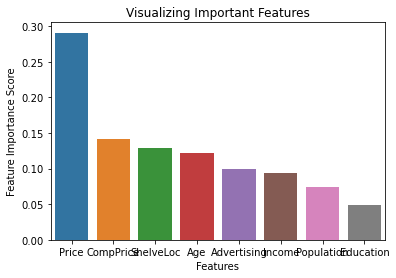

In [35]:
sns.barplot(x=feature_imp.index, y= feature_imp)
plt.xlabel("Features")
plt.ylabel("Feature Importance Score")
plt.title("Visualizing Important Features")
plt.show()

### Looping function for checking the Random Forest Classifier in different Maximum Features

In [36]:
train_accuracy=[]
test_accuracy=[]
for i in range(1,10):
    model2=RandomForestClassifier(n_estimators=115, max_features =6)
    model2.fit(x_train,y_train)
    train_accuracy.append(model2.score(x_train,y_train))
    test_accuracy.append(model2.score(x_test,y_test))

In [37]:
df=pd.Series(train_accuracy)
df

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
dtype: float64

In [38]:
df2=pd.Series(test_accuracy)
df2

0    0.791667
1    0.800000
2    0.816667
3    0.808333
4    0.791667
5    0.791667
6    0.791667
7    0.783333
8    0.783333
dtype: float64

### Listing the accuracies based on different  maximum feature in both training and testing

In [39]:
data=pd.DataFrame({'Max_features':range(1,10),'Train_acc':train_accuracy,'Test_acc':test_accuracy})
data

,Max_features,Train_acc,Test_acc
0,1,1.0,0.791667
1,2,1.0,0.800000
2,3,1.0,0.816667
3,4,1.0,0.808333
4,5,1.0,0.791667
5,6,1.0,0.791667
6,7,1.0,0.791667
7,8,1.0,0.783333
8,9,1.0,0.783333


### Visualization using maximum features

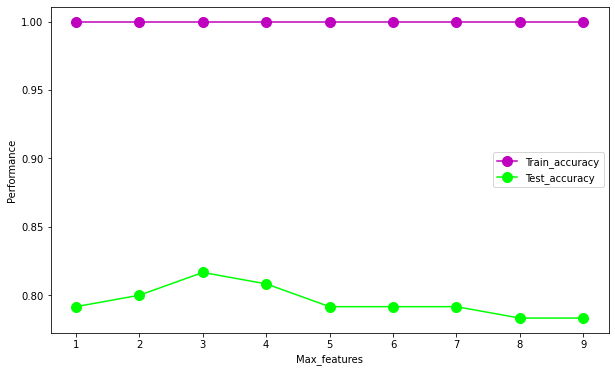

In [40]:
labels=["Train_accuracy","Test_accuracy"]
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot()
plt.plot(data["Max_features"],data["Train_acc"],marker="o",markersize=10,color="m")
plt.plot(data["Max_features"],data["Test_acc"],marker="o",markersize=10,color="lime")
ax.set_xticks(np.arange(1,10))
plt.legend(labels)
plt.xlabel("Max_features")
plt.ylabel("Performance")
plt.show()

# ========================================================================